In [ ]:
s = "Sing a song of sixpence, A pocket full of rye. Four and twenty blackbirds, Baked in a pie. When the pie was opened The birds began to sing; Wasn't that a dainty dish, To set before the king. The king was in his counting house, Counting out his money; The queen was in the parlour, Eating bread and honey. The maid was in the garden, Hanging out the clothes, When down came a blackbird And pecked off her nose." 

In [ ]:
from pickle import load
from keras.models import load_model
from keras.utils import to_categorical
from keras_preprocessing.sequence import pad_sequences
from pickle import dump
from keras.utils import to_categorical
from keras.utils.vis_utils import plot_model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [ ]:
#load doc into memory
def load_doc(filename):
  # open the file as read only
  file = open(filename, 'r')
  # read all text
  text = file.read()
  # close the file
  file.close()
  return text
# save tokens to file, one dialog per line
def save_doc(lines, filename):
  data = '\n'.join(lines)
  file = open(filename, 'w')
  file.write(data)
  file.close()
# load text
raw_text = s#load_doc('rhyme.txt')
print(raw_text)
# clean
tokens = raw_text.split()
raw_text = ' '.join(tokens)
# organize into sequences of characters
length = 10
sequences = list()
for i in range(length, len(raw_text)):
  # select sequence of tokens
  seq = raw_text[i-length:i+1]
  # store
  sequences.append(seq)
print('Total Sequences: %d' % len(sequences))
# save sequences to file
out_filename = 'char_sequences.txt'
save_doc(sequences, out_filename)

Sing a song of sixpence, A pocket full of rye. Four and twenty blackbirds, Baked in a pie. When the pie was opened The birds began to sing; Wasn't that a dainty dish, To set before the king. The king was in his counting house, Counting out his money; The queen was in the parlour, Eating bread and honey. The maid was in the garden, Hanging out the clothes, When down came a blackbird And pecked off her nose.
Total Sequences: 399


In [ ]:
# load doc into memory
def load_doc(filename):
  # open the file as read only
  file = open(filename, 'r')
  # read all text
  text = file.read()
  # close the file
  file.close()
  return text
# load
in_filename = 'char_sequences.txt'
raw_text = load_doc(in_filename)
lines = raw_text.split('\n')
lines

['Sing a song',
 'ing a song ',
 'ng a song o',
 'g a song of',
 ' a song of ',
 'a song of s',
 ' song of si',
 'song of six',
 'ong of sixp',
 'ng of sixpe',
 'g of sixpen',
 ' of sixpenc',
 'of sixpence',
 'f sixpence,',
 ' sixpence, ',
 'sixpence, A',
 'ixpence, A ',
 'xpence, A p',
 'pence, A po',
 'ence, A poc',
 'nce, A pock',
 'ce, A pocke',
 'e, A pocket',
 ', A pocket ',
 ' A pocket f',
 'A pocket fu',
 ' pocket ful',
 'pocket full',
 'ocket full ',
 'cket full o',
 'ket full of',
 'et full of ',
 't full of r',
 ' full of ry',
 'full of rye',
 'ull of rye.',
 'll of rye. ',
 'l of rye. F',
 ' of rye. Fo',
 'of rye. Fou',
 'f rye. Four',
 ' rye. Four ',
 'rye. Four a',
 'ye. Four an',
 'e. Four and',
 '. Four and ',
 ' Four and t',
 'Four and tw',
 'our and twe',
 'ur and twen',
 'r and twent',
 ' and twenty',
 'and twenty ',
 'nd twenty b',
 'd twenty bl',
 ' twenty bla',
 'twenty blac',
 'wenty black',
 'enty blackb',
 'nty blackbi',
 'ty blackbir',
 'y blackbird',
 ' black

In [ ]:
raw_text

"Sing a song\ning a song \nng a song o\ng a song of\n a song of \na song of s\n song of si\nsong of six\nong of sixp\nng of sixpe\ng of sixpen\n of sixpenc\nof sixpence\nf sixpence,\n sixpence, \nsixpence, A\nixpence, A \nxpence, A p\npence, A po\nence, A poc\nnce, A pock\nce, A pocke\ne, A pocket\n, A pocket \n A pocket f\nA pocket fu\n pocket ful\npocket full\nocket full \ncket full o\nket full of\net full of \nt full of r\n full of ry\nfull of rye\null of rye.\nll of rye. \nl of rye. F\n of rye. Fo\nof rye. Fou\nf rye. Four\n rye. Four \nrye. Four a\nye. Four an\ne. Four and\n. Four and \n Four and t\nFour and tw\nour and twe\nur and twen\nr and twent\n and twenty\nand twenty \nnd twenty b\nd twenty bl\n twenty bla\ntwenty blac\nwenty black\nenty blackb\nnty blackbi\nty blackbir\ny blackbird\n blackbirds\nblackbirds,\nlackbirds, \nackbirds, B\nckbirds, Ba\nkbirds, Bak\nbirds, Bake\nirds, Baked\nrds, Baked \nds, Baked i\ns, Baked in\n, Baked in \n Baked in a\nBaked in a \naked in a p

In [ ]:
chars = sorted(list(set(raw_text)))
mapping = dict((c, i) for i, c in enumerate(chars))

In [ ]:
sequences = list()
for line in lines:
	# integer encode line
	encoded_seq = [mapping[char] for char in line]
	# store
	sequences.append(encoded_seq)

In [ ]:
# vocabulary size
vocab_size = len(mapping)
print('Vocabulary Size: %d' % vocab_size)

Vocabulary Size: 38


In [ ]:
import numpy as np

sequences = np.array(sequences)
X, y = sequences[:,:-1], sequences[:,-1]

In [ ]:
sequences = [to_categorical(x, num_classes=vocab_size) for x in X]
X = np.array(sequences)
y = to_categorical(y, num_classes=vocab_size)

In [ ]:
X.shape

(399, 10, 38)

In [ ]:
# define model
model = Sequential()
model.add(LSTM(75, input_shape=(X.shape[1], X.shape[2])))
model.add(Dense(vocab_size, activation='softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 75)                34200     
                                                                 
 dense (Dense)               (None, 38)                2888      
                                                                 
Total params: 37,088
Trainable params: 37,088
Non-trainable params: 0
_________________________________________________________________
None


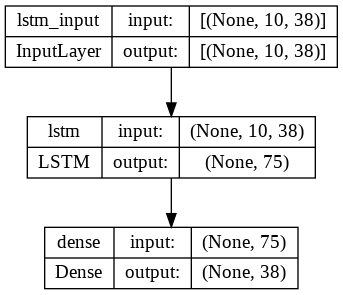

In [ ]:
plot_model(model, to_file='model.png', show_shapes=True)

In [ ]:
# compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit model
model.fit(X, y, epochs=100, verbose=2)

Epoch 1/100
13/13 - 4s - loss: 3.6172 - accuracy: 0.1203 - 4s/epoch - 282ms/step
Epoch 2/100
13/13 - 0s - loss: 3.5213 - accuracy: 0.1930 - 122ms/epoch - 9ms/step
Epoch 3/100
13/13 - 0s - loss: 3.2293 - accuracy: 0.1905 - 115ms/epoch - 9ms/step
Epoch 4/100
13/13 - 0s - loss: 3.0935 - accuracy: 0.1905 - 115ms/epoch - 9ms/step
Epoch 5/100
13/13 - 0s - loss: 3.0211 - accuracy: 0.1905 - 115ms/epoch - 9ms/step
Epoch 6/100
13/13 - 0s - loss: 2.9968 - accuracy: 0.1905 - 124ms/epoch - 10ms/step
Epoch 7/100
13/13 - 0s - loss: 2.9746 - accuracy: 0.1905 - 135ms/epoch - 10ms/step
Epoch 8/100
13/13 - 0s - loss: 2.9596 - accuracy: 0.1905 - 114ms/epoch - 9ms/step
Epoch 9/100
13/13 - 0s - loss: 2.9392 - accuracy: 0.1905 - 121ms/epoch - 9ms/step
Epoch 10/100
13/13 - 0s - loss: 2.9161 - accuracy: 0.1905 - 119ms/epoch - 9ms/step
Epoch 11/100
13/13 - 0s - loss: 2.9023 - accuracy: 0.1905 - 115ms/epoch - 9ms/step
Epoch 12/100
13/13 - 0s - loss: 2.8779 - accuracy: 0.1930 - 108ms/epoch - 8ms/step
Epoch 13/100

In [ ]:
# save the model to file
model.save('model.h5')

In [ ]:
# save the mapping
dump(mapping, open('mapping.pkl', 'wb'))

In [ ]:
from pickle import load
from keras.models import load_model
from keras.utils import to_categorical
from keras_preprocessing.sequence import pad_sequences

# generate a sequence of characters with a language model
def generate_seq(model, mapping, seq_length, seed_text, n_chars):
   in_text = seed_text
   # generate a fixed number of characters
   for _ in range(n_chars):
      # encode the characters as integers
      encoded = [mapping[char] for char in in_text]
      # truncate sequences to a fixed length
      encoded = pad_sequences([encoded], maxlen=seq_length, truncating='pre')
      #print(encoded.shape)
      # one hot encode
      encoded = to_categorical(encoded, num_classes=len(mapping))
      #print(encoded.shape)
      #encoded = encoded.reshape(1, encoded.shape[0], encoded.shape[1])
      # predict character
      yhat = np.argmax(model.predict(encoded, verbose=0))
      # reverse map integer to character
      out_char = ''
      for char, index in mapping.items():
         if index == yhat:
            out_char = char
            break
      # append to input
      in_text += char
   return in_text

# load the model
model = load_model('model.h5')
# load the mapping
mapping = load(open('mapping.pkl', 'rb'))

# test start of rhyme
print(generate_seq(model, mapping, 10, 'Sing a son', 20))
# test mid-line
print(generate_seq(model, mapping, 10, 'king was i', 20))
# test not in original
print(generate_seq(model, mapping, 10, 'hello worl', 20))

Sing a song of sixpence, A poc
king was in his counting house
hello worls, Fea in  angs. Whe
